In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

C:\Users\valde\AppData\Local\Temp\ipykernel_7356\653209856.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
model = joblib.load('../../models/rf_harvest_model.pkl')

# Carica i dati
features = pd.read_csv("../../data/processed/features_india.csv")

# Seleziona le caratteristiche e il target
X = features[['alt', 'lat', 'lon', 'superficie_media', 'prec_media', 'temp_media']]

X = X.rename(columns={
    'superficie_media': 'superficie',
    'prec_media': 'prec',
    'temp_media': 'temp'
})

y = features['produzione_media']

# Visualizza dataset
display(X)
display(y)

,alt,lat,lon,superficie,prec,temp
0,2432.0,27.57417,91.92437,1243.222222,2535.841667,25.420699
1,56.0,26.14934,87.51323,53775.333333,1064.358333,25.420699
2,588.0,19.87757,75.34226,73976.000000,1064.358333,26.291667
3,116.0,24.75204,84.37420,73976.000000,1064.358333,26.291667
4,85.0,24.88091,86.92257,26840.000000,1064.358333,25.420699
...,...,...,...,...,...,...
97,1600.0,29.59713,79.65911,39189.111111,1381.858333,25.420699
98,882.0,29.83738,79.77161,15044.000000,1381.858333,25.420699
99,1626.0,29.33501,80.07783,8343.555556,1381.858333,25.420699
100,295.0,29.94791,78.16025,44580.444444,1381.858333,25.420699


0        1922.888889
1      108128.333333
2      147189.444444
3      147189.444444
4       62144.888889
           ...      
97      40982.555556
98      19094.000000
99      10246.222222
100    118148.222222
101     33341.333333
Name: produzione_media, Length: 102, dtype: float64

In [17]:
predictions = model.predict(X)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y, predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - predictions) / y)) * 100

# Explained Variance Score
evs = explained_variance_score(y, predictions)

# Max Error
max_err = max_error(y, predictions)

# Median Absolute Error
medae = median_absolute_error(y, predictions)

# Stampa formattata con f-string
print(f"{'Metriche':<50} {'Valori':>10}")
print("=" * 60)
print(f"{'Mean Absolute Error (MAE):':<50} {mae:.2f}")
print(f"{'Mean Squared Error (MSE):':<50} {mse:.2f}")
print(f"{'Root Mean Squared Error (RMSE):':<50} {rmse:.2f}")
print(f"{'R-squared (R²):':<50} {r2:.2f}")
print(f"{'Mean Absolute Percentage Error (MAPE):':<50} {mape:.2f}%")
print(f"{'Explained Variance Score:':<50} {evs:.2f}")
print(f"{'Max Error:':<50} {max_err:.2f}")
print(f"{'Median Absolute Error:':<50} {medae:.2f}")


Metriche                                               Valori
Mean Absolute Error (MAE):                         1324030.80
Mean Squared Error (MSE):                          2708229255921.06
Root Mean Squared Error (RMSE):                    1645669.85
R-squared (R²):                                    -25.38
Mean Absolute Percentage Error (MAPE):             2637.47%
Explained Variance Score:                          -8.30
Max Error:                                         2587719.32
Median Absolute Error:                             1427478.81


In [18]:
errors = y - predictions

error_df = pd.DataFrame({
    'citta': features['citta'],
    'errore': errors,
    'lat': X['lat'],
    'lon': X['lon'],
    'alt': X['alt']
})

display(error_df)

,citta,errore,lat,lon,alt
0,tawang,-4.598311e+04,27.57417,91.92437,2432.0
1,araria,-2.520574e+06,26.14934,87.51323,56.0
2,aurangabad,-2.481512e+06,19.87757,75.34226,588.0
3,aurangabad,-2.481512e+06,24.75204,84.37420,116.0
4,banka,-2.271156e+06,24.88091,86.92257,85.0
...,...,...,...,...,...
97,almora,-2.587719e+06,29.59713,79.65911,1600.0
98,bageshwar,-6.916359e+05,29.83738,79.77161,882.0
99,champawat,-4.852823e+05,29.33501,80.07783,1626.0
100,haridwar,-2.510554e+06,29.94791,78.16025,295.0


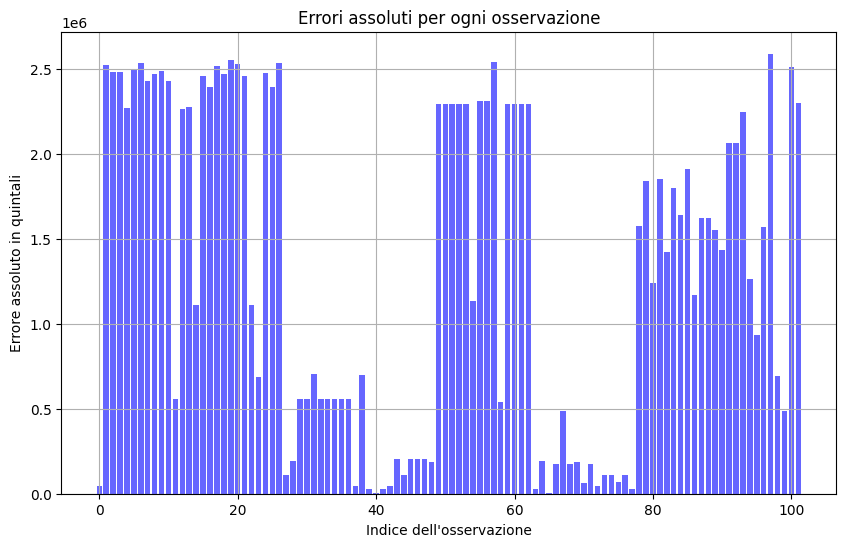

In [19]:
residuals = y - predictions

errors = np.abs(residuals)

plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors, color='blue', alpha=0.6)
plt.title('Errori assoluti per ogni osservazione')
plt.xlabel('Indice dell\'osservazione')
plt.ylabel('Errore assoluto in quintali')
plt.grid(True)
plt.show()


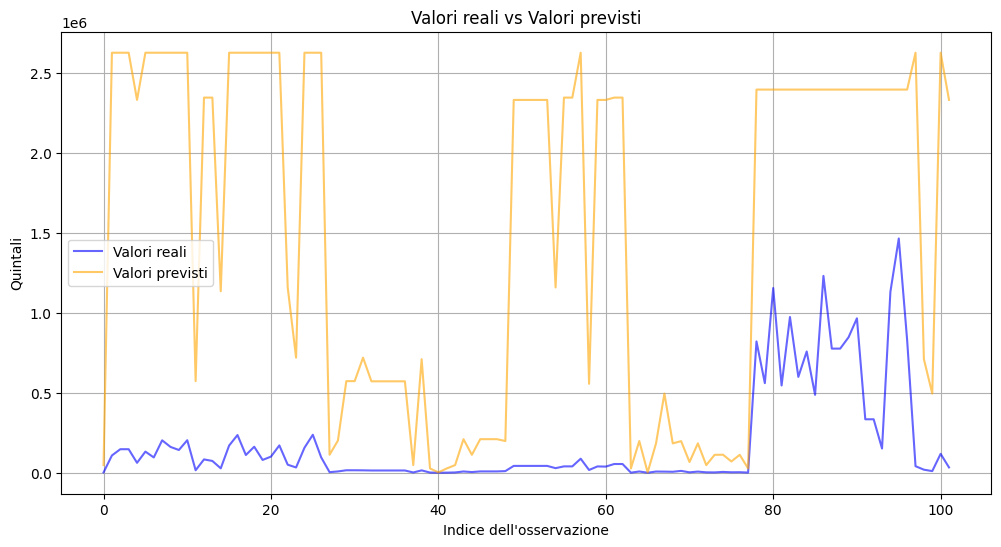

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y.reset_index(drop=True), label='Valori reali', color='blue', alpha=0.6)
plt.plot(predictions, label='Valori previsti', color='orange', alpha=0.6)
plt.title('Valori reali vs Valori previsti')
plt.xlabel('Indice dell\'osservazione')
plt.ylabel('Quintali')
plt.legend()
plt.grid(True)
plt.show()


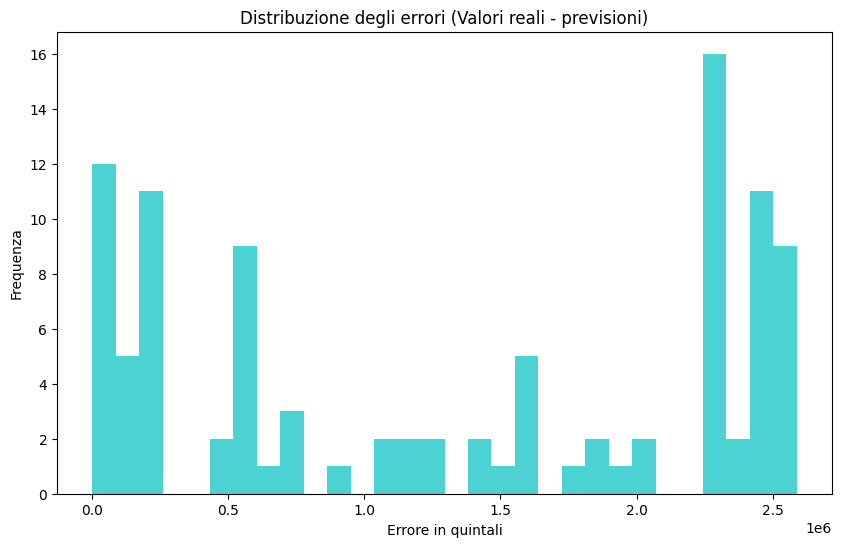

In [21]:
plt.figure(figsize=(10, 6))

# Istogramma degli errori
plt.hist(errors, bins=30, color='c', alpha=0.7)
plt.title('Distribuzione degli errori (Valori reali - previsioni)')
plt.xlabel('Errore in quintali')
plt.ylabel('Frequenza')
plt.show()

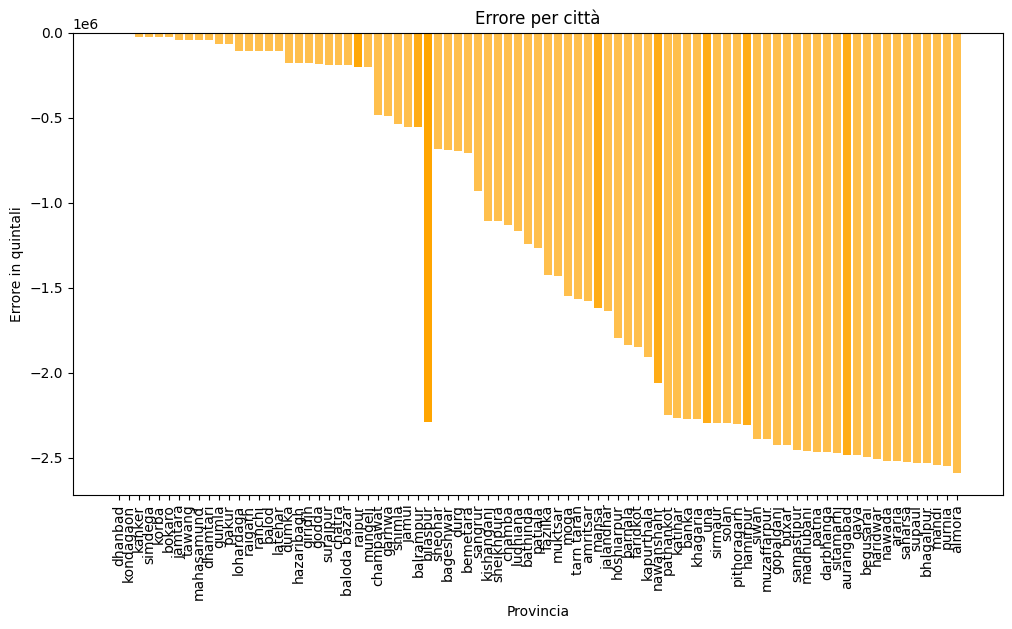

In [22]:
plt.figure(figsize=(12, 6))

# Ordina l'errore per provincia
error_df_sorted = error_df.sort_values(by='errore', ascending=False)

# Grafico a barre degli errori
plt.bar(error_df_sorted['citta'], error_df_sorted['errore'], color='orange', alpha=0.7)
plt.xticks(rotation=90)  # Ruota i nomi delle province
plt.title('Errore per città')
plt.xlabel('Provincia')
plt.ylabel('Errore in quintali')
plt.show()